# 第一章

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Supervised-Learning" data-toc-modified-id="Supervised-Learning-1">Supervised Learning</a></span></li><li><span><a href="#Unsupervised-Learning" data-toc-modified-id="Unsupervised-Learning-2">Unsupervised Learning</a></span></li><li><span><a href="#Cost-Function-代价函数" data-toc-modified-id="Cost-Function-代价函数-3">Cost Function 代价函数</a></span></li><li><span><a href="#Gradient-Descent-梯度下降算法" data-toc-modified-id="Gradient-Descent-梯度下降算法-4">Gradient Descent 梯度下降算法</a></span></li><li><span><a href="#Normal-Equation-Method" data-toc-modified-id="Normal-Equation-Method-5">Normal Equation Method</a></span></li></ul></div>

# Content

## Supervised Learning

<img src="./img/1-1.png" width="33%">

* ***Regression*** refers to predict a continuous valued output.


* ***Classfication*** refers to predict a discrete valued output (e.g. 0, 1, 2, 3).


   ## Unsupervised Learning
   * ***Clustering*** 

## Cost Function 代价函数

对于一元线性回归问题：

> **Hypothesis:**
>    
> $h_\theta=\theta_0+\theta_1x$
>
> **Parameters:**
>
> $\theta_0, \theta_1$
>
> **Cost Function:**
>
>$J(\theta_0, \theta_1)=\frac{1}{2m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2$
>
> **Goal:** $minimize J(\theta_0, \theta_1)$


其中代价函数表示为误差的平方，$m$ 为训练样本数量，$h(x)$ 为假设 *(hypothesis)* 函数。

通过 $minimize J(\theta)$ 求得 $\theta$ 参数。

## Gradient Descent 梯度下降算法

* **Gradient descent algorithm:**

    repeat until convergence {

    $\theta_j := \theta_j - \alpha\frac{\partial}{\partial\theta_j}J(\theta_0, \theta_1)$, (for $j=0$ and $j=1$)

    }

    where $\alpha$ denotes the learning rate, controlling how big a step we take when updating parameter $\theta_j$.


* **Simultaneous update:**

    temp0 := $\theta_0 - \alpha\frac{\partial}{\partial\theta_0}J(\theta_0, \theta_1)$

    temp1 := $\theta_1 - \alpha\frac{\partial}{\partial\theta_1}J(\theta_0, \theta_1)$

    $\theta_0$ := temp0

    $\theta_1$ := tem1

* **Learning rate $\alpha$**

<img src="./img/1-2.png" width="33%">

    As we approach a local minimum, gradient descent will automatically take smaller steps (斜率正数越来越小). So, no need to decrease $\alpha$ over time.

* **Batch gradient descent, BGD**

    "Batch": Each step of gradient descent uses all the training examples.

    优点：精确

    缺点：样本数量大时，速度慢
    
* **Stochastic gradient descent, SGD**
 
* **Mini-batch gradient descent, MBGD**

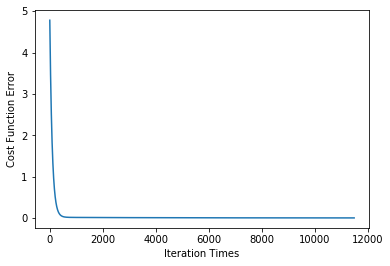

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt


x = [1, 2, 3]
y = [2, 3, 4]

theta_0 = 0
theta_1 = 0

m = len(x) # number of training examples

alpha = 0.001 # learning rate

threshold = 0.001 # error control

cost_dict = {} # cost function result 

iter_num = 0 # iteration times


def cost_j(theta_0, theta_1):
    tmp = 0
    for i in range(m):
        tmp += (theta_0 + theta_1 * x[i] - y[i])**2
    return tmp/(2*m)


def gradient_descent(theta_0, theta_1):
    tmp_0 = tmp_1 = 0
    for i in range(m):
        tmp_0 += theta_0 + theta_1 * x[i] - y[i]
        tmp_1 += (theta_0 + theta_1 * x[i] - y[i]) * x[i]
    theta_0 -= alpha * tmp_0 / m
    theta_1 -= alpha * tmp_1 / m
    return theta_0, theta_1


cost = cost_j(theta_0, theta_1)
#print("initial cost = {}".format(cost))

while cost > threshold:
    theta_0, theta_1 = gradient_descent(theta_0, theta_1)
    iter_num += 1
    cost = cost_j(theta_0, theta_1)
    cost_dict[iter_num] = cost
    #print("iteration {}, theta_0 = {}, theta_1 = {}".format(iter_num, theta_0, theta_1))

plt.figure()
plt.plot(cost_dict.keys(), cost_dict.values())
plt.xlabel("Iteration Times")
plt.ylabel("Cost Function Error")
plt.show()

## Normal Equation Method



# #TODO
* 求最优的算法之一最小二乘法 与梯度下降法的关系
* 梯度下降法局部最优问题的解决方法
* BGD, SGD, MBGD

# Reference

1. [吴恩达机器学习系列课程][1].
  
  
  
[1]: https://www.bilibili.com/video/BV164411b7dx?p=1